# KNN
Diese Notebook dient lediglich der Veranschaulichung derKNN. Dazu verwende ich im ersten Beispiel den IRIS-Dataset. Vorteil an der Geschichte ist das der Datensaz ohne DataPreprocessing auskommt, da keine Vorverabreitung nötig ist(weder Imputation noch Skalierung). Dieses notebook dient lediglich der Veranschaulichung des gewählten Algorithmuses. Ergo wird hier auch keine EDA gemacht

## eigene Implementierung in Beispielprojekte
[IRIS](https://github.com/JHC90/Basic-DataScience-Skills/blob/master/Sample-Projects/Iris/Iris-WorkThrough.ipynb)


## Load Data

In [1]:
import pandas as pd
iris = pd.read_csv('./Sample-Projects/Iris/data/iris.data',delimiter=',',encoding='utf-8')
iris.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

## Split Train Test

In [2]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris, test_size = 0.3, random_state=5)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(104, 5)
(45, 5)


## Split input output

In [64]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [65]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(104, 4)
(104,)
(45, 4)
(45,)


# KNN

## Create Model

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #for checking the model accuracy

In [67]:
#model=KNeighborsClassifier(n_neighbors=2) #this examines 3 neighbours for putting the new data into a class
model = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
model.fit(train_X,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Prediction

In [68]:
prediction=model.predict(test_X)

## Accuracy

In [69]:
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9555555555555556


## Tuning

K-nearest hat das Konzept, dass eine anzahl k von zentren vorgegegeben sind, wir versuchen die mal zu ändern und gegenzuchecken, hier vorsichtig in dem BSP von IRIS, da ich hier immer 100% hab, das kann eigentlich nicht sein. hier ein loop der die Daten Sukzessive k erhöht

([<matplotlib.axis.XTick at 0x23f5b72d0f0>,
 <a list of 10 Text xticklabel objects>)

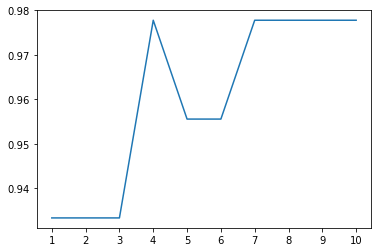

In [71]:
import matplotlib.pyplot as plt
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)